In [1]:
import pandas as pd
import numpy as np
import random
import swifter
random.seed(42)
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv('trip_data_1.csv') # file for january
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [3]:
len(set(df['medallion'])), len(set(df['hack_license']))

(13426, 32224)

In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [5]:
aggregate_df = df.groupby([df['pickup_datetime'].dt.date])['pickup_datetime'].agg('count')
aggregate_df.head()

pickup_datetime
2013-01-01    412630
2013-01-02    393001
2013-01-03    441233
2013-01-04    478437
2013-01-05    473804
Name: pickup_datetime, dtype: int64

In [6]:
assert aggregate_df.sum() == len(df) # sanity check: sum of frequencies of all days of january == all rides in January

/Users/imote/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

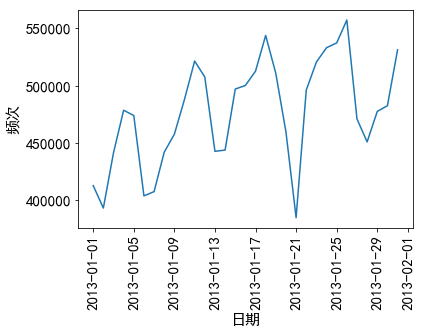

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams.update({'font.size': 15})
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aggregate_df.index, aggregate_df)
ax.set_xlabel('日期')
ax.set_ylabel('频次')
# formatter = mdates.DateFormatter("%m月%d日")
# ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.savefig('jan_date_vs_rides_dist.pdf',bbox_inches='tight')
plt.show()

In [8]:
aggregate_time = df.groupby([df['pickup_datetime'].dt.hour])['pickup_datetime'].agg('count')
aggregate_time, len(aggregate_time)


(pickup_datetime
 0     531347
 1     401365
 2     307314
 3     227515
 4     164900
 5     143100
 6     304640
 7     546976
 8     694630
 9     700817
 10    658908
 11    675108
 12    723139
 13    721154
 14    757578
 15    743037
 16    647936
 17    767050
 18    934546
 19    941645
 20    866823
 21    833123
 22    806661
 23    677303
 Name: pickup_datetime, dtype: int64, 24)

<Figure size 432x288 with 0 Axes>

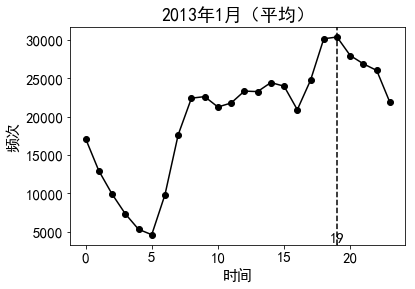

In [11]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aggregate_time.index, aggregate_time/31, marker='o', color='k')

peak_hour = np.argmax(np.array(aggregate_time))

ax.axvline(x=peak_hour, linestyle='--', color='k')
ax.tick_params('x', which='minor', direction='in', pad=-12)
ax.xaxis.set_ticks([peak_hour], minor=True)
ax.xaxis.set_ticklabels(list(map(str, [peak_hour])), minor=True)
ax.set_title('2013年1月（平均）')
ax.set_xlabel('时间')
ax.set_ylabel('频次')
plt.savefig('jan_hour_vs_rides_dist.svg',bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

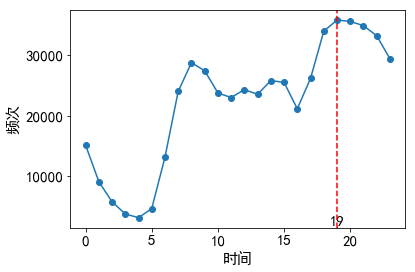

In [21]:
aggregate_time_last_day = df.groupby([df['pickup_datetime'][df['pickup_datetime'].dt.day == 31].dt.hour])['pickup_datetime'].agg('count')

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aggregate_time_last_day.index, aggregate_time_last_day, marker='o')

off_peak_hour = 19

ax.axvline(x=off_peak_hour, linestyle='--', color='r')
ax.tick_params('x', which='minor', direction='in', pad=-12)
ax.xaxis.set_ticks([off_peak_hour], minor=True)
ax.xaxis.set_ticklabels(list(map(str, [off_peak_hour])), minor=True)
ax.set_title('2013年1月31日')
ax.set_xlabel('时间')
ax.set_ylabel('频次')
plt.savefig('31_jan_hour_vs_rides_dist.pdf',bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

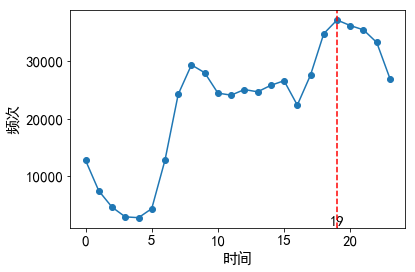

In [25]:
aggregate_time_last_day = df.groupby([df['pickup_datetime'][df['pickup_datetime'].dt.day == 24].dt.hour])['pickup_datetime'].agg('count')

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aggregate_time_last_day.index, aggregate_time_last_day, marker='o')

off_peak_hour = 19

ax.axvline(x=off_peak_hour, linestyle='--', color='r')
ax.tick_params('x', which='minor', direction='in', pad=-12)
ax.xaxis.set_ticks([off_peak_hour], minor=True)
ax.xaxis.set_ticklabels(list(map(str, [off_peak_hour])), minor=True)
# ax.set_title('2013年1月3日')
ax.set_xlabel('时间')
ax.set_ylabel('频次')
plt.savefig('24_jan_hour_vs_rides_dist.pdf',bbox_inches='tight')
plt.show()

In [69]:
(np.min(df['pickup_latitude']), np.min(df['dropoff_latitude']),
    np.max(df['pickup_latitude']), np.max(df['dropoff_latitude']))

(-3547.9207, -3547.9207, 3310.3645, 3477.1055)

In [70]:
(min(df['pickup_longitude'].min(), df['dropoff_longitude'].min()),
    max(df['pickup_longitude'].max(), df['dropoff_longitude'].max()))

(-2771.2854, 2228.7375)

In [71]:
def valid_coordinate_bool(series, lower, upper):
    """
    series is a list of pandas series objects
    lower and upper are lower and upper bound for coordinates to be valid
    """
    final_condition = np.logical_and(np.abs(series[0]) > lower, np.abs(series[0]) < upper)
    for i in range(1, len(series)):
        final_condition = np.logical_and(final_condition, np.logical_and(np.abs(series[i]) > lower, np.abs(series[i]) < upper))
    return final_condition

In [94]:
# valid_latitudes = valid_coordinate_bool([df['pickup_latitude'], df['dropoff_latitude']], 40.4, 41)
# valid_longitudes = valid_coordinate_bool([df['pickup_longitude'], df['dropoff_longitude']], 73, 75)
# valid_rows_bool = np.logical_and(valid_latitudes, valid_longitudes)
valid_latitudes = valid_coordinate_bool([df['pickup_latitude'], df['dropoff_latitude']], 40.74, 40.76)
valid_longitudes = valid_coordinate_bool([df['pickup_longitude'], df['dropoff_longitude']], 73.97, 73.99)
valid_rows_bool = np.logical_and(valid_latitudes, valid_longitudes)

In [95]:
np.count_nonzero(valid_rows_bool), len(df), len(df) - np.count_nonzero(valid_rows_bool)

(678691, 14776615, 14097924)

In [120]:
filtered_df = df.iloc[df.index[valid_rows_bool]]
filtered_df['pickup_longitude'][filtered_df['pickup_longitude'] > 0] *= -1
filtered_df['dropoff_longitude'][filtered_df['dropoff_longitude'] > 0] *= -1
filtered_df.head()

/Users/imote/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/imote/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
64,4728FA63A46613319446ED726626FED3,4A6C8D08FAB98E9C9B21399C5255EED0,CMT,1,N,2013-01-08 11:33:23,2013-01-08 11:48:13,1,889,0.6,-73.987732,40.751884,-73.981720,40.746529
66,0CC08DE5645A7137059499EA11886805,4F2627F9FD34A9B9EFCCFC5147048345,CMT,1,N,2013-01-07 18:45:14,2013-01-07 18:52:54,3,459,0.9,-73.979706,40.758427,-73.985558,40.747265
68,1159BD618BE1D4A90D522416A77AC29A,9964A99249A4888E2C6AE55BA78A6F64,CMT,1,N,2013-01-10 15:04:11,2013-01-10 15:07:35,1,204,0.7,-73.980118,40.754601,-73.988045,40.748962


In [121]:
assert len(filtered_df) == np.count_nonzero(valid_rows_bool)

In [122]:
drivers = np.unique(df['hack_license'])
drivers_races = np.array(['black'] * len(drivers))
drivers_gender = np.array(['m'] * len(drivers))
random.seed(42)
drivers_races[random.sample(list(np.arange(len(drivers))), k=int(len(drivers)/3))] = ['white'] # 2:1 black:white
random.seed(42)
drivers_gender[random.sample(list(np.arange(len(drivers))), k=int(len(drivers)/6))] = ['f'] # 5:1 males:females

In [123]:
random.seed(42)
drivers_gender[random.sample(list(np.arange(len(drivers))), k=int(len(drivers)/6))]

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype='<U1')

In [124]:
hack_id_to_race = dict(zip(drivers, drivers_races))
hack_id_to_gender = dict(zip(drivers, drivers_gender))
(np.count_nonzero(drivers_races == 'black')/np.count_nonzero(drivers_races == 'white'), 
 np.count_nonzero(drivers_gender == 'm')/np.count_nonzero(drivers_gender == 'f'))

(2.0000931012010055, 5.000744878957169)

In [125]:
driver_race_series = filtered_df['hack_license'].map(hack_id_to_race)
driver_gender_series = filtered_df['hack_license'].map(hack_id_to_gender)

In [126]:
np.count_nonzero(driver_race_series == 'black'), np.count_nonzero(driver_race_series == 'white')

(453942, 224749)

In [127]:
filtered_df['driver_race'] = driver_race_series
filtered_df['driver_gender'] = driver_gender_series
filtered_df.head()

/Users/imote/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/imote/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,driver_race,driver_gender
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,black,m
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,black,m
64,4728FA63A46613319446ED726626FED3,4A6C8D08FAB98E9C9B21399C5255EED0,CMT,1,N,2013-01-08 11:33:23,2013-01-08 11:48:13,1,889,0.6,-73.987732,40.751884,-73.981720,40.746529,black,m
66,0CC08DE5645A7137059499EA11886805,4F2627F9FD34A9B9EFCCFC5147048345,CMT,1,N,2013-01-07 18:45:14,2013-01-07 18:52:54,3,459,0.9,-73.979706,40.758427,-73.985558,40.747265,black,m
68,1159BD618BE1D4A90D522416A77AC29A,9964A99249A4888E2C6AE55BA78A6F64,CMT,1,N,2013-01-10 15:04:11,2013-01-10 15:07:35,1,204,0.7,-73.980118,40.754601,-73.988045,40.748962,black,m


In [128]:
requests_gender = np.array(['f'] * len(filtered_df))
requests_race = np.array(['black'] * len(filtered_df))
random.seed(42)
requests_race[random.sample(list(np.arange(len(requests_race))), k=int(len(requests_race)/3))] = 'white'

r1_indices = np.where(requests_race == 'black')[0]
random.seed(42)
random_choice_r1 = random.sample(list(r1_indices), k=int(len(r1_indices)/2))
requests_gender[random_choice_r1] = 'm'
print (np.count_nonzero(requests_gender == 'm'))
assert np.count_nonzero(requests_gender == 'm') == len(random_choice_r1)
r2_indices = np.where(requests_race == 'white')[0]
random.seed(42)
random_choice_r2 = random.sample(list(r2_indices), k=int(len(r2_indices)/2))
requests_gender[random_choice_r2] = 'm'

226230


In [129]:
assert len(r1_indices) + len(r2_indices) == len(requests_race)
assert len(set(list(r1_indices)).intersection(set(list(r2_indices)))) == 0
assert len(set(list(random_choice_r1)).intersection(set(list(random_choice_r2)))) == 0

In [130]:
(np.count_nonzero(requests_gender == 'm'), np.count_nonzero(requests_gender == 'f'),
     np.count_nonzero(requests_race == 'white'), np.count_nonzero(requests_race == 'black'))

(339345, 339346, 226230, 452461)

In [131]:
filtered_df['requests_gender'] = requests_gender
filtered_df['requests_race'] = requests_race
filtered_df.head()

/Users/imote/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/imote/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,driver_race,driver_gender,requests_gender,requests_race
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,black,m,f,black
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,black,m,f,black
64,4728FA63A46613319446ED726626FED3,4A6C8D08FAB98E9C9B21399C5255EED0,CMT,1,N,2013-01-08 11:33:23,2013-01-08 11:48:13,1,889,0.6,-73.987732,40.751884,-73.981720,40.746529,black,m,f,black
66,0CC08DE5645A7137059499EA11886805,4F2627F9FD34A9B9EFCCFC5147048345,CMT,1,N,2013-01-07 18:45:14,2013-01-07 18:52:54,3,459,0.9,-73.979706,40.758427,-73.985558,40.747265,black,m,m,black
68,1159BD618BE1D4A90D522416A77AC29A,9964A99249A4888E2C6AE55BA78A6F64,CMT,1,N,2013-01-10 15:04:11,2013-01-10 15:07:35,1,204,0.7,-73.980118,40.754601,-73.988045,40.748962,black,m,m,black


In [132]:
filtered_df = filtered_df[filtered_df['pickup_datetime'].dt.hour == 19]

In [133]:
# len(filtered_df)

In [134]:
min_latitude = min(np.min(filtered_df['pickup_latitude']), np.min(filtered_df['dropoff_latitude']))
max_latitude = max(np.max(filtered_df['pickup_latitude']), np.max(filtered_df['dropoff_latitude']))
min_longitude = min(np.min(filtered_df['pickup_longitude']), np.min(filtered_df['dropoff_longitude']))
max_longitude = max(np.max(filtered_df['pickup_longitude']), np.max(filtered_df['dropoff_longitude']))

In [135]:
# np.arange(min_longitude, max_longitude, 0.05), np.arange(min_latitude, max_latitude, 0.05)
# max_longitude = -74.48333
# max_latitude = 40.900002
np.arange(min_longitude, max_longitude, 0.0019), np.arange(min_latitude, max_latitude, 0.0019)

(array([-73.989998, -73.988098, -73.986198, -73.984298, -73.982398,
        -73.980498, -73.978598, -73.976698, -73.974798, -73.972898,
        -73.970998]),
 array([40.740002, 40.741902, 40.743802, 40.745702, 40.747602, 40.749502,
        40.751402, 40.753302, 40.755202, 40.757102, 40.759002]))

In [136]:
def coordinates_to_bin(val, coordinate_type):
    steps = (val - min_latitude)/0.0019 if coordinate_type == 'latitude' else (val - min_longitude)/0.0019
#     if np.isclose(int(steps), steps, rtol=0, atol=0.00000001):
#         steps += 1
    return int(steps)

In [137]:
filtered_df['pickup_lat_bin'] = filtered_df['pickup_latitude'].swifter.apply(coordinates_to_bin, args=('latitude',))
filtered_df['pickup_long_bin'] = filtered_df['pickup_longitude'].swifter.apply(coordinates_to_bin, args=('longitude',))
filtered_df['dropoff_lat_bin'] = filtered_df['dropoff_latitude'].swifter.apply(coordinates_to_bin, args=('latitude',))
filtered_df['dropoff_long_bin'] = filtered_df['dropoff_longitude'].swifter.apply(coordinates_to_bin, args=('longitude',))

In [138]:
filtered_df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_longitude,dropoff_latitude,driver_race,driver_gender,requests_gender,requests_race,pickup_lat_bin,pickup_long_bin,dropoff_lat_bin,dropoff_long_bin
17848,4FD308879BBF08AC228ED8AB9D834738,30ECA3C001E94AAABC213E2520C40F15,CMT,1,N,2013-01-18 19:39:47,2013-01-18 19:43:38,1,231,0.40,...,-73.976974,40.752090,black,m,f,black,3,6,6,6
18801,ECD4B9E380041AF2E159BD9993020EDF,145B7ABDF85230E96FC7FBF091C3F6C9,CMT,1,N,2013-01-18 19:45:33,2013-01-18 19:49:35,1,242,0.80,...,-73.971077,40.755768,black,m,f,black,3,6,8,9
79069,873562ABA9FEBB12CFEA925E0CCB8077,60E596E5AEE82B0E1A32707BB9B3C4C1,CMT,1,N,2013-01-19 19:27:33,2013-01-19 19:34:57,1,444,1.60,...,-73.986595,40.740330,black,m,m,black,10,7,0,1
93850,323CFA8722F8D8E1CC90FF3C6FE3964B,F5AC5A461DB81015FC714A0BD46AD493,VTS,1,NaN,2013-01-13 19:14:00,2013-01-13 19:27:00,1,780,1.93,...,-73.974083,40.742924,black,m,f,black,8,0,1,8
93851,D9BC809E02CE49151DC3BE6FD5715EA4,2A3A711D0A22772253B7C5BD88E086B7,VTS,1,NaN,2013-01-13 19:18:00,2013-01-13 19:29:00,6,660,1.39,...,-73.985954,40.757767,black,m,m,white,10,2,9,2


In [139]:
# fdf = filtered_df.groupby(['pickup_lat_bin','pickup_long_bin','dropoff_lat_bin','dropoff_long_bin']).size().reset_index(name='counts')
fdf = filtered_df.groupby(['pickup_lat_bin','pickup_long_bin']).size().reset_index(name='counts')

In [140]:
fdf.to_csv('pp_test_data.csv', index=False)

In [ ]:
# filtered_df.to_csv('trip_data_1_filtered.csv', index=False)